In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'colab'
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier

logging.basicConfig(level=logging.INFO, format="%(asctime)s [%(levelname)s] %(message)s")
logger = logging.getLogger(__name__)

In [109]:
df = pd.read_csv("/content/bank-marketing-campaign.csv", sep = ';')
logger.info(f"Dataset shape: {df.shape}")
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [111]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [112]:
df.shape

(41188, 21)

In [113]:
#Checking out the categories and their respective counts in each feature
print("Job:",df.job.value_counts(),sep = '\n')
print("-"*40)
print("Marital:",df.marital.value_counts(),sep = '\n')
print("-"*40)
print("Education:",df.education.value_counts(),sep = '\n')
print("-"*40)
print("Default:",df.default.value_counts(),sep = '\n')
print("-"*40)
print("Housing loan:",df.housing.value_counts(),sep = '\n')
print("-"*40)
print("Personal loan:",df.loan.value_counts(),sep = '\n')
print("-"*40)
print("Contact:",df.contact.value_counts(),sep = '\n')
print("-"*40)
print("Month:",df.month.value_counts(),sep = '\n')
print("-"*40)
print("Day:",df.day_of_week.value_counts(),sep = '\n')
print("-"*40)
print("Previous outcome:",df.poutcome.value_counts(),sep = '\n')
print("-"*40)
print("Outcome of this campaign:",df.y.value_counts(),sep = '\n')
print("-"*40)

Job:
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
----------------------------------------
Marital:
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
----------------------------------------
Education:
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64
----------------------------------------
Default:
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64
----------------------------------------
Housing loan:
housing
yes        2157

In [114]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


## Duration of calls vs Job roles

In [115]:
fig = px.box(df, x="job", y="duration", color="y")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

Insights:

Comparing the average, the blue collar, entrepreneur have high duration in calls and student, retired have less duration in average.


## Campaign vs Duration calls

In [116]:
fig = px.scatter(df, x="campaign", y="duration", color="y")
fig.show()


Insights:

The more the duration the calls were, they had higher probability in making a deposit.

Duration of calls faded as the time period of campaign extended further.

There were many positive leads in the initial days of campaign

## Campaign vs Month

<BarContainer object of 41188 artists>

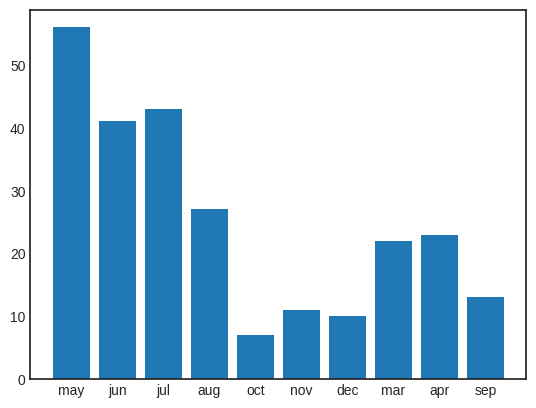

In [117]:
plt.bar(df['month'], df['campaign'])

Insights:

We can see the campaign were mostly concentrated in the starting of the bank period ( May, June and July).

Usually education period starts during that time so there is a possibility that parents make deposits in the name of their children.

They also have made their campaign in the end of the bank period.

## Distribution of Quarterly Indicators

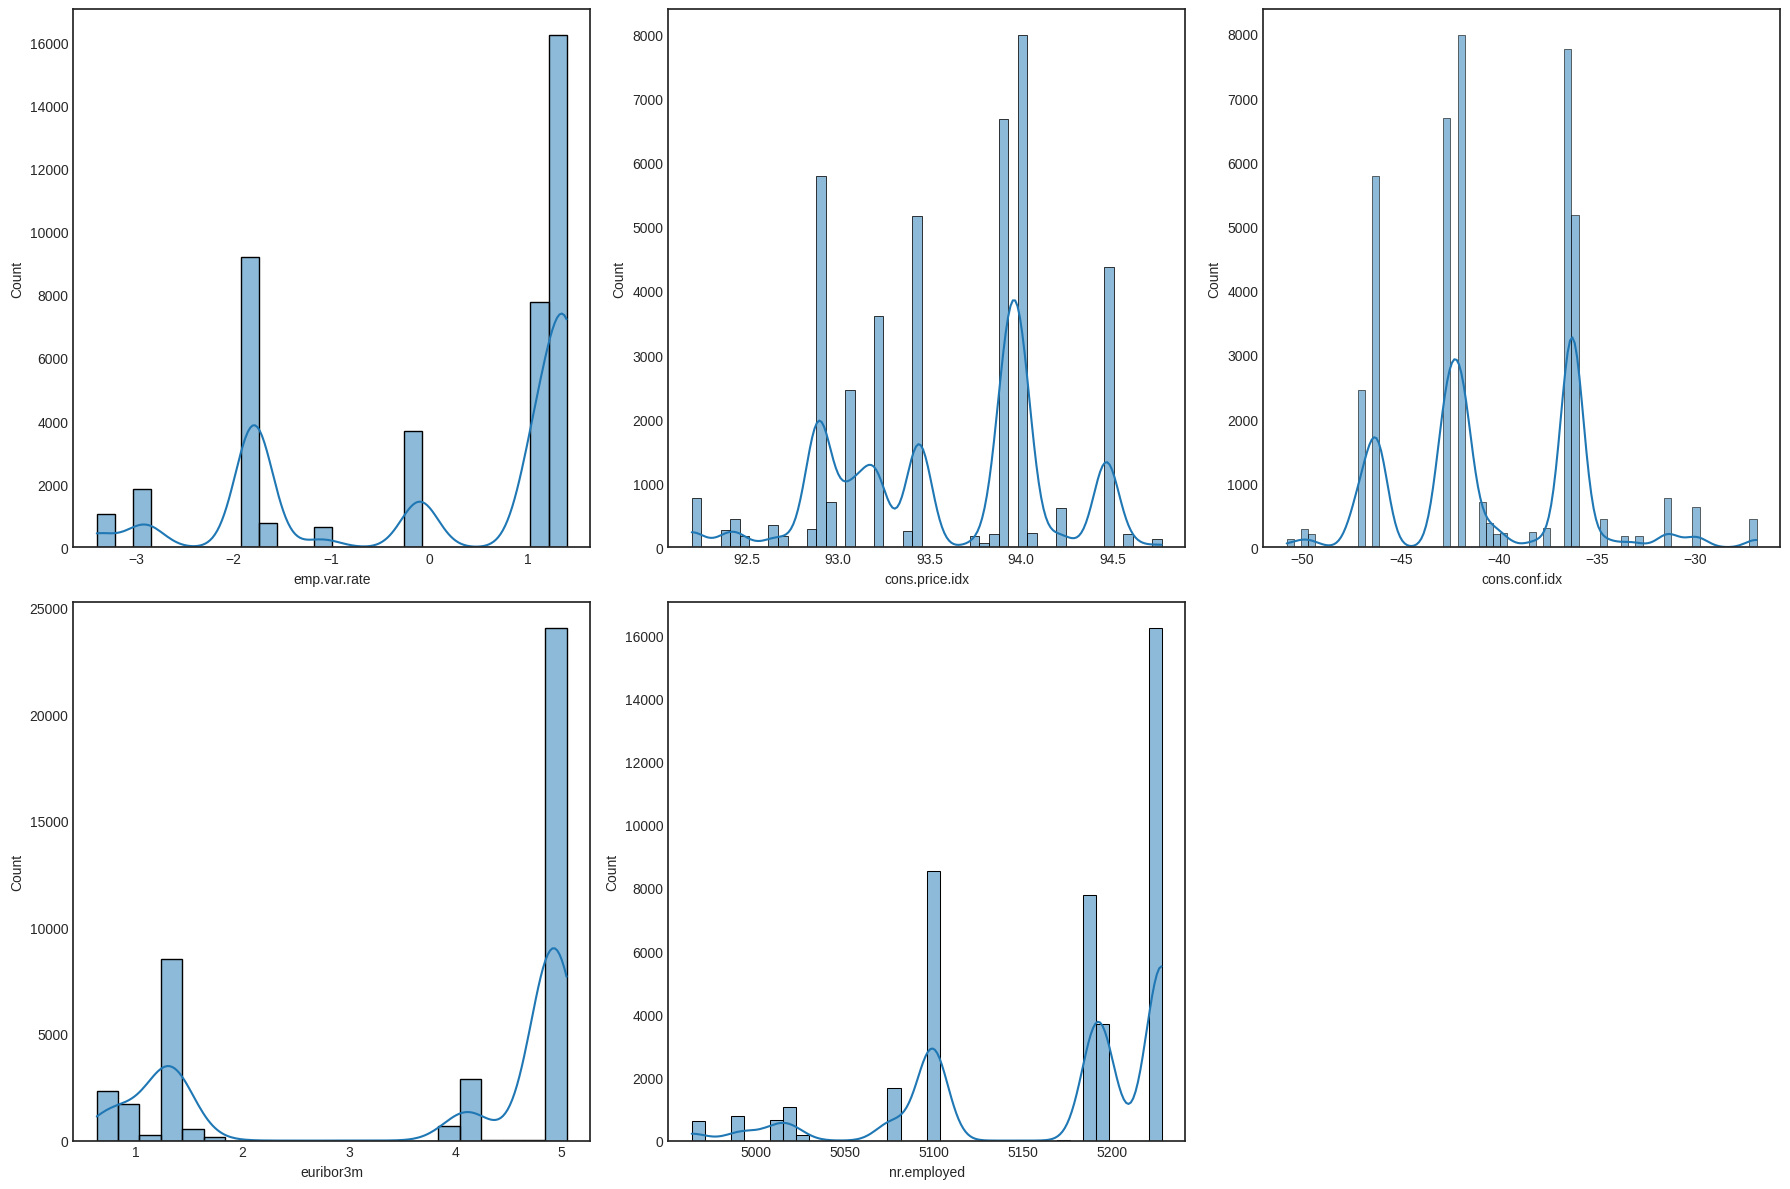

In [118]:
fig = plt.figure(figsize=(18, 12))

plt.subplot(231)
sns.histplot(df['emp.var.rate'], kde=True)

plt.subplot(232)
sns.histplot(df['cons.price.idx'], kde=True)

plt.subplot(233)
sns.histplot(df['cons.conf.idx'], kde=True)

plt.subplot(234)
sns.histplot(df['euribor3m'], kde=True)

plt.subplot(235)
sns.histplot(df['nr.employed'], kde=True)

plt.tight_layout()
plt.show()


Insights:

We can see there is a high employee variation rate which signifies that they have made the campaign when there were high shifts in job due to conditions of economy.

The Consumer price index is also good which shows the leads where having good price to pay for goods and services may be that could be the reason to stimulate these leads into making a deposit and plant the idea of savings.

Consumer confidence index is pretty low as they don't have much confidence on the fluctuating economy.

The 3 month Euribor interest rate is the interest rate at which a selection of European banks lend one another funds denominated in euros whereby the loans have a maturity of 3 months. In our case the interest rates are high for lending their loans.

The number of employees were also at peak which can increase their income index that could be the reason the campaign targetted the leads who were employeed to make a deposit

## Marital Status vs Price index

<Axes: xlabel='cons.price.idx', ylabel='marital'>

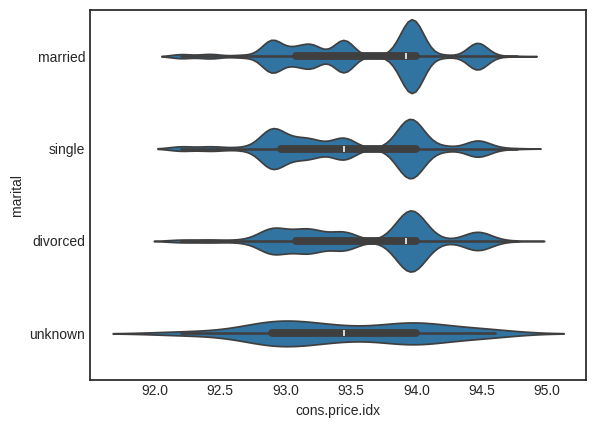

In [119]:
sns.violinplot(y=df["marital"], x=df["cons.price.idx"] )

Insights:

There are very minute differences among the price index.

Married leads have considerably have an upper hand as they have index contributing as couple

## Positive deposits vs attributes

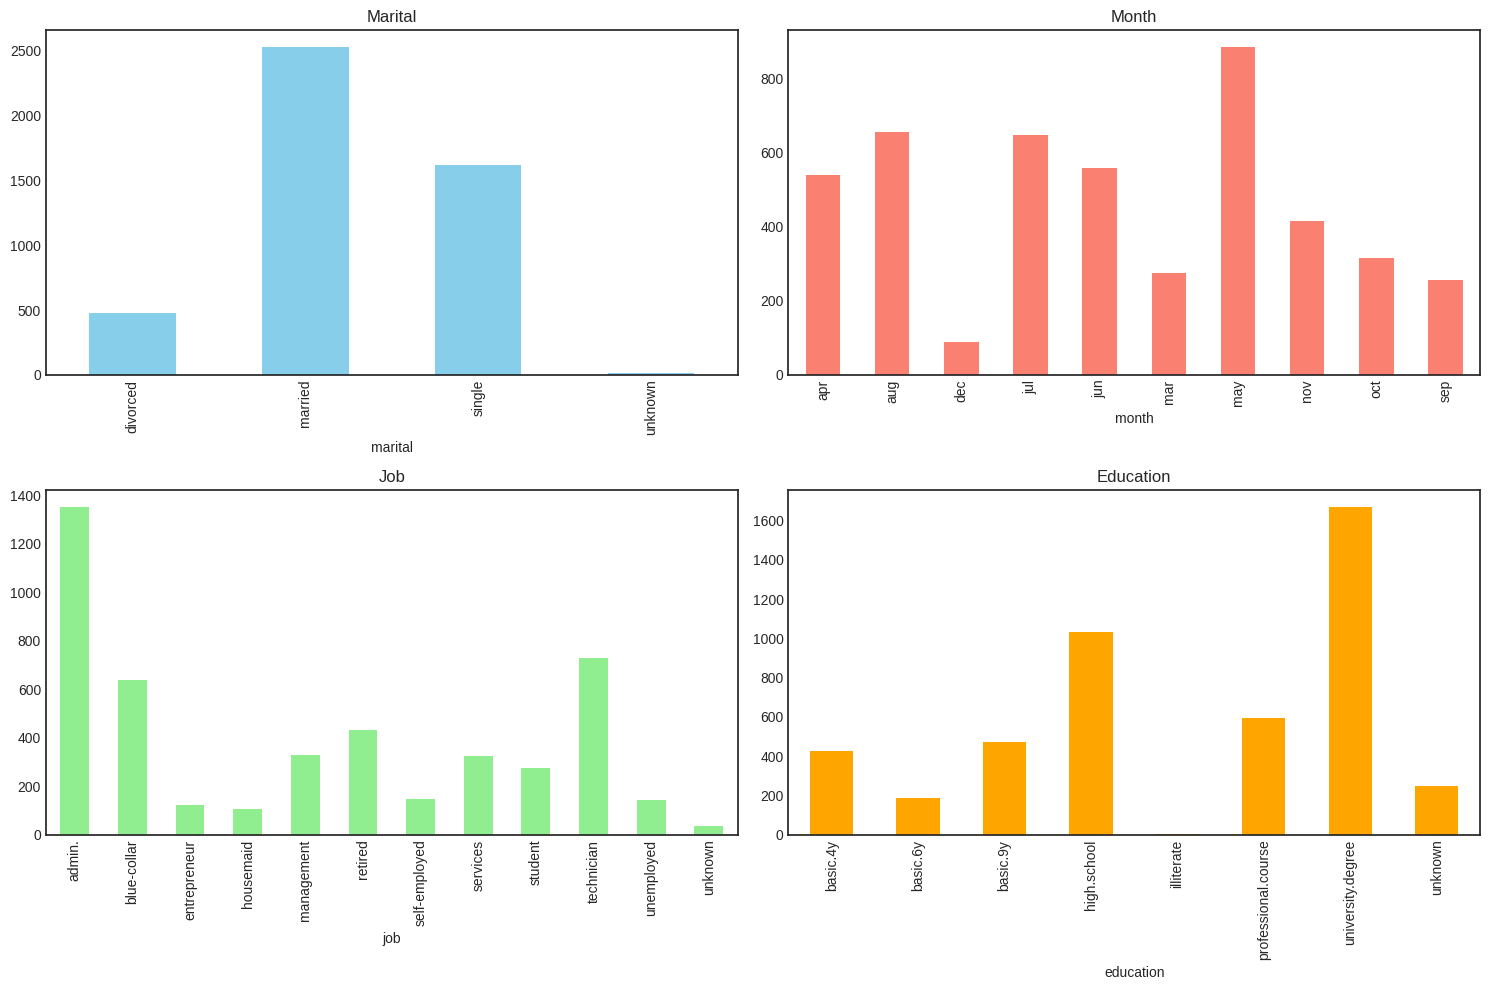

In [120]:
bank_yes = df[df['y'] == 'yes']

df1 = pd.crosstab(index=bank_yes["marital"], columns="count")
df2 = pd.crosstab(index=bank_yes["month"], columns="count")
df3 = pd.crosstab(index=bank_yes["job"], columns="count")
df4 = pd.crosstab(index=bank_yes["education"], columns="count")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

df1.plot.bar(ax=axes[0,0], legend=False, color='skyblue')
axes[0,0].set_title('Marital')

df2.plot.bar(ax=axes[0,1], legend=False, color='salmon')
axes[0,1].set_title('Month')

df3.plot.bar(ax=axes[1,0], legend=False, color='lightgreen')
axes[1,0].set_title('Job')

df4.plot.bar(ax=axes[1,1], legend=False, color='orange')
axes[1,1].set_title('Education')

plt.tight_layout()
plt.show()

Insights:

Married leads have made high deposits followed by single.

There were much deposist made during may month as it is the start of bank period.

Leads who work in administrative position made deposits followed by technicians and blue collar employees.

Leads who had atleast university degree had made te deposits followed by highschool

## Correlation plot of attributes

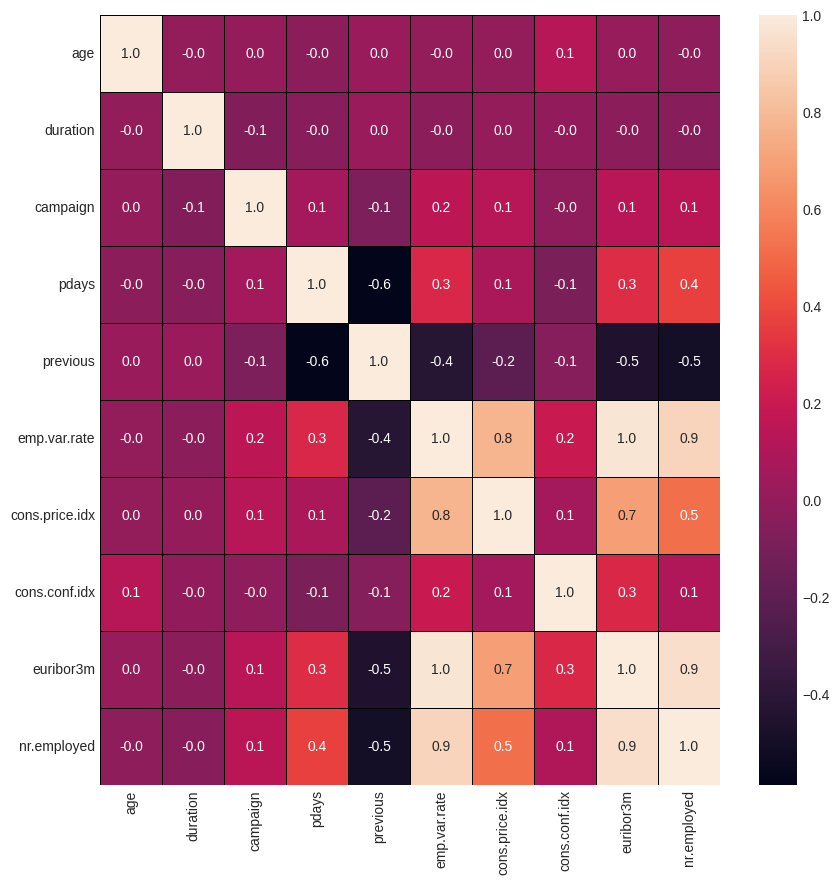

In [121]:
corr = df.select_dtypes(include=['number']).corr()

f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True, linewidths=0.5, linecolor="black", fmt=".1f", ax=ax)
plt.show()

Insights:

The indicators have correlation among themselves.

Number of employees rate is highly correlated with employee variation rate.

Consumer price index is highly correlated with bank interest rate( higher the price index, higher the interest rate).

Employee variation rate also correlates with the bank interest rates.

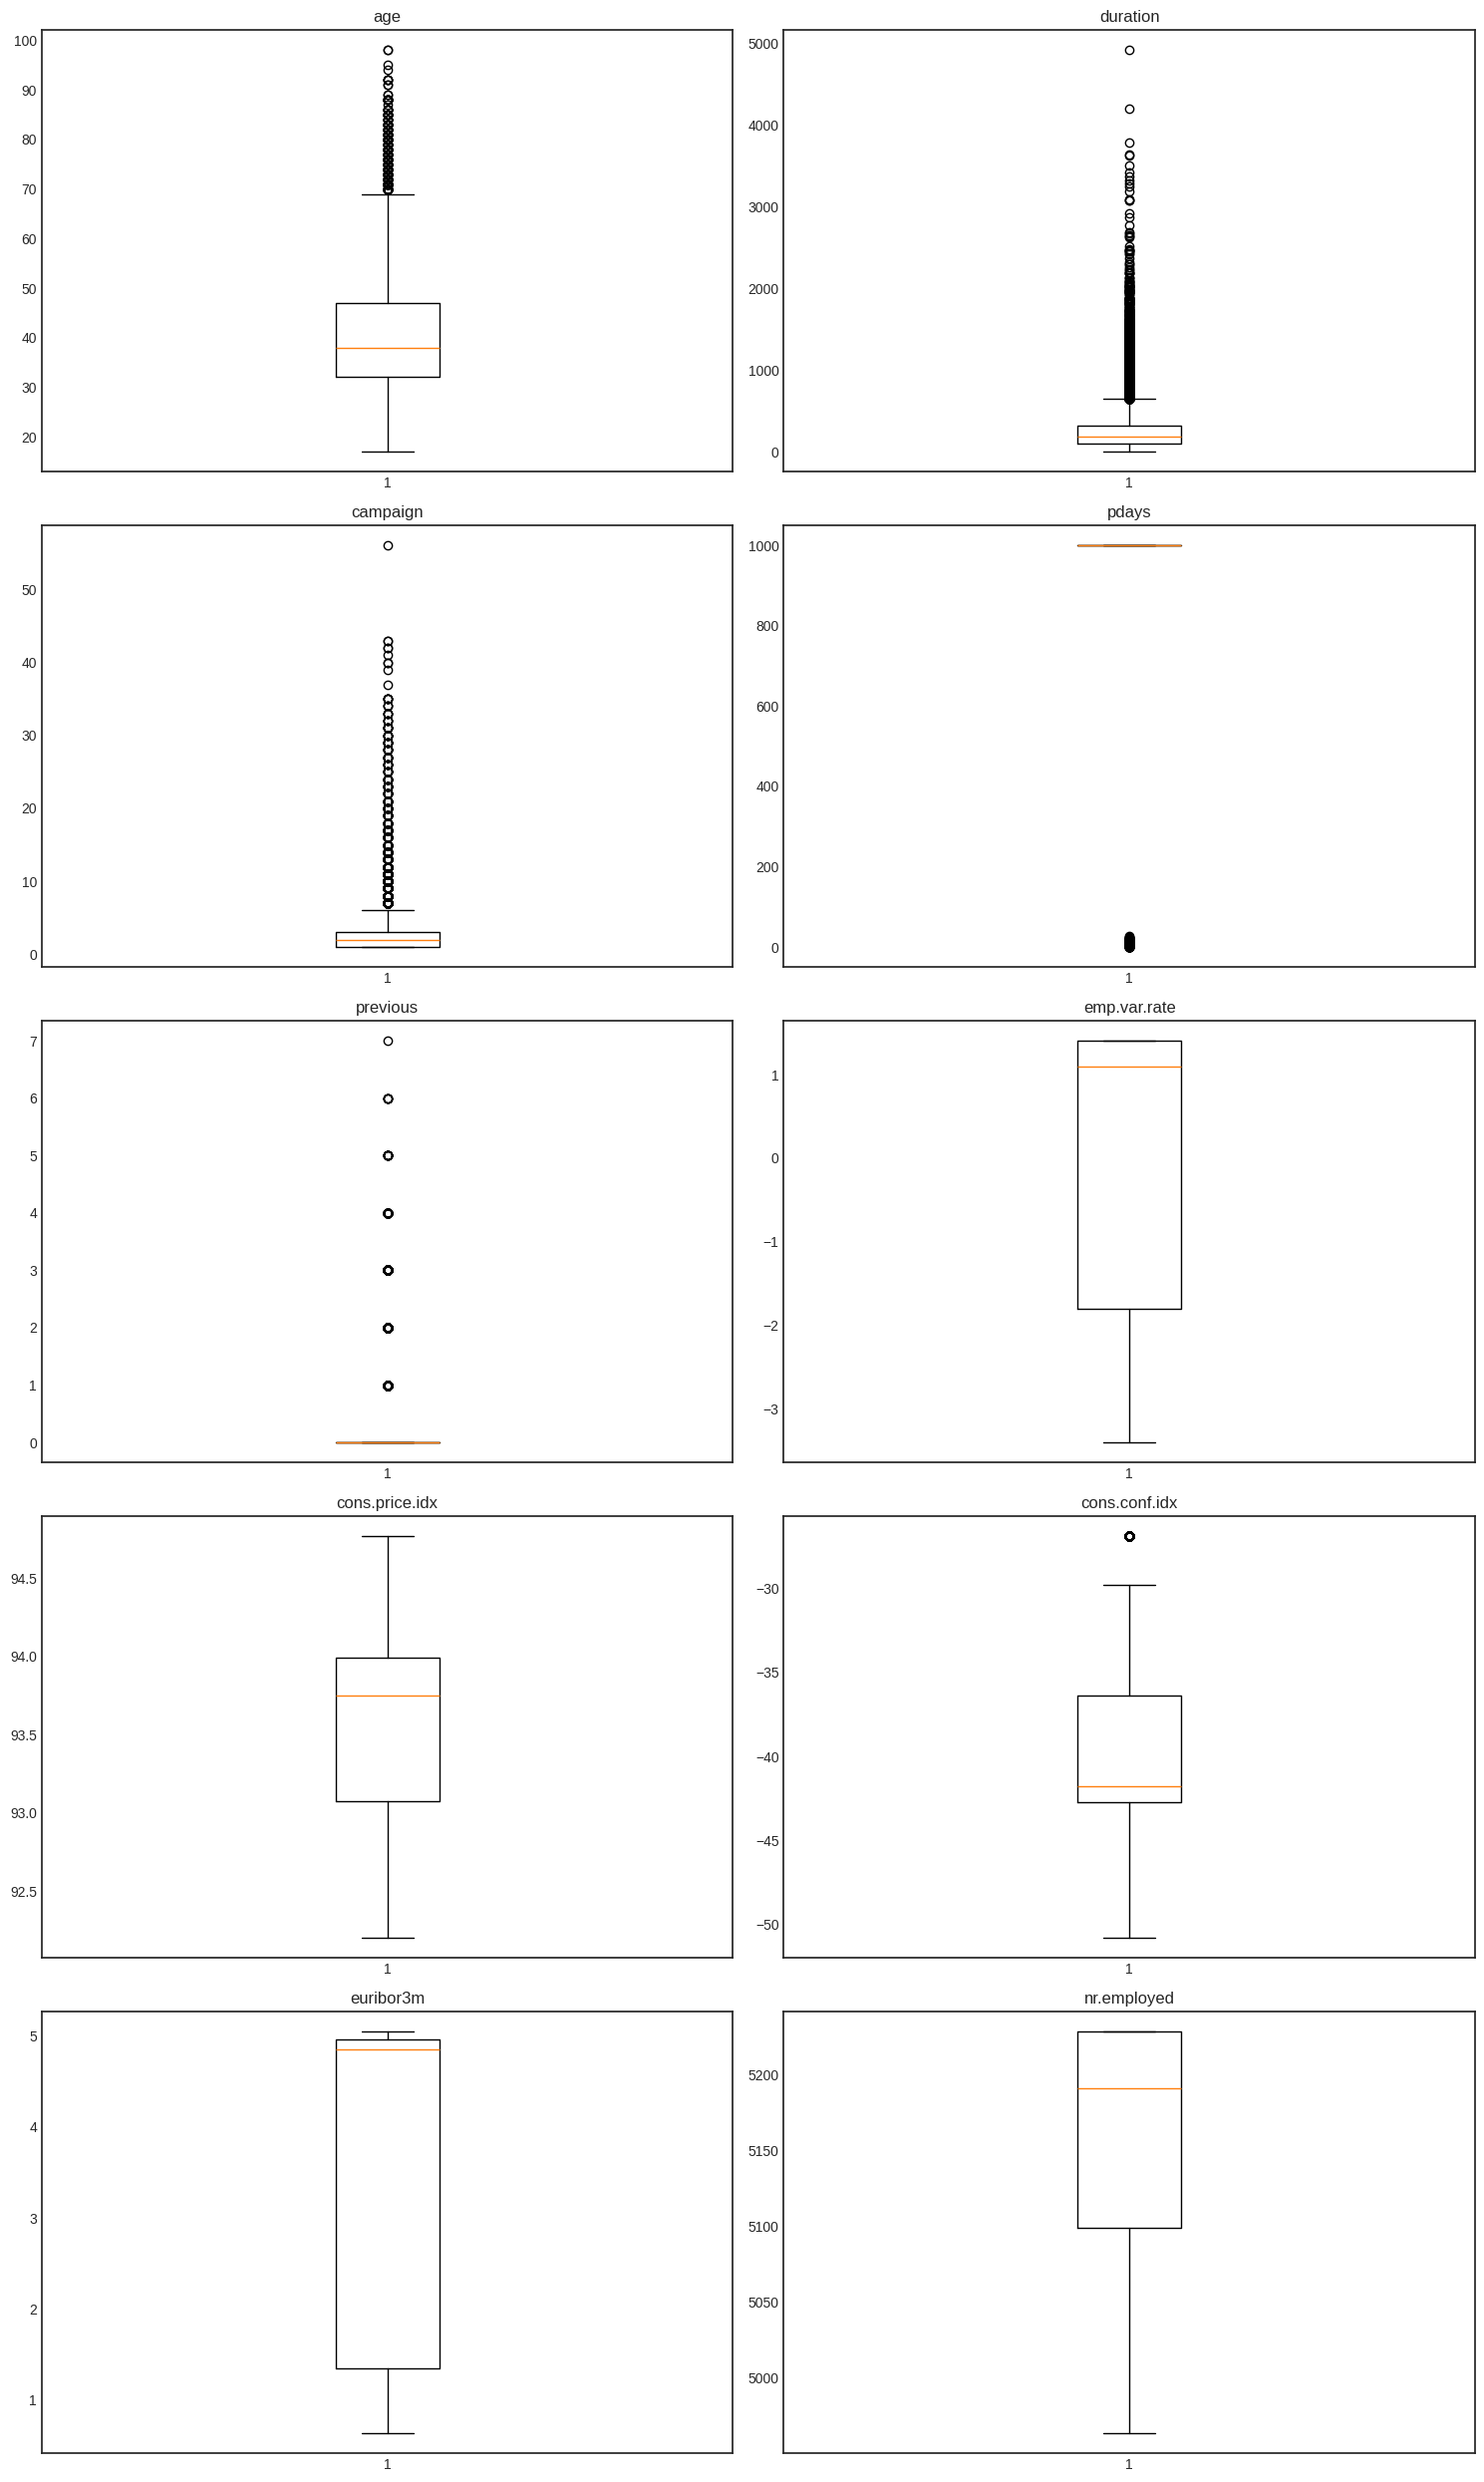

In [122]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))
plt.style.use('seaborn-v0_8-white')

cols = [
    'age','duration','campaign','pdays','previous',
    'emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'
]

axes = axes.flatten()

for ax, col in zip(axes, cols):
    ax.boxplot(df[col])
    ax.set_title(col)

plt.tight_layout()
plt.show()

Insights:

We see that many features doesn't have much outliers except for age,duration and campaign. So, let's fix only those features using IQR method.

In [123]:
numerical_features = ['age','campaign','duration']

mask = pd.Series(True, index=df.index)

for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    col_mask = (df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)
    mask &= col_mask

df = df.loc[mask]


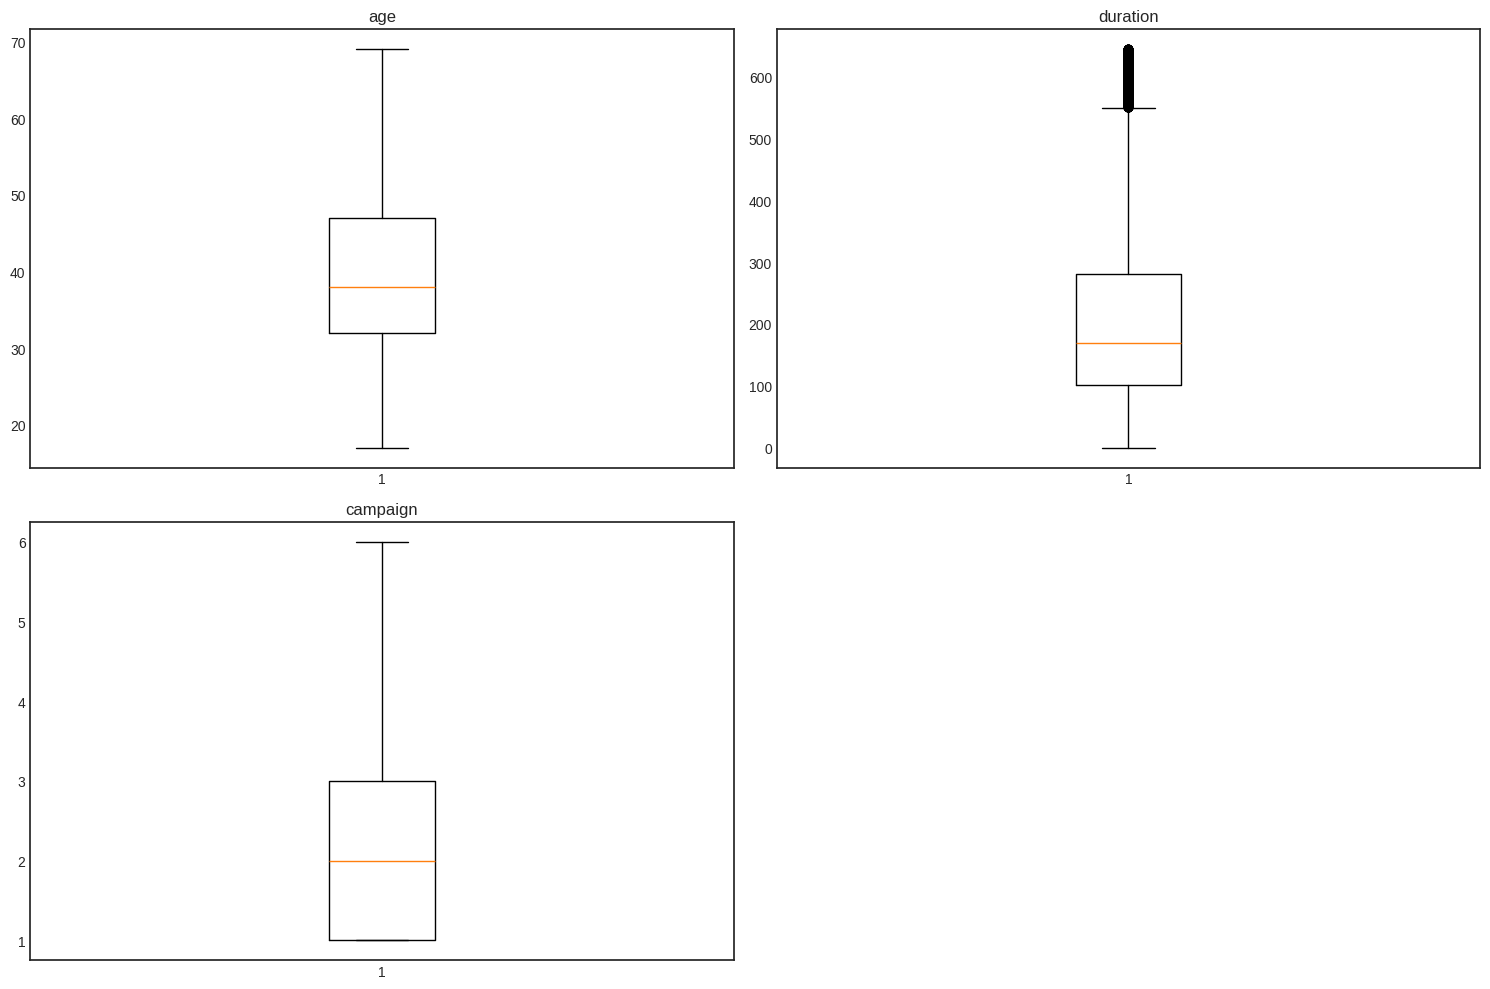

In [124]:
plt.style.use('seaborn-v0_8-white')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

axes = axes.flatten()
cols = ['age','duration','campaign']

for i, col in enumerate(cols):
    axes[i].boxplot(df[col])
    axes[i].set_title(col)

axes[3].axis('off')
plt.tight_layout()
plt.show()

Insights:

Now that we have removed outliers, we can proceed for more feature engineering techniques.

## Education- category clubbing
Here we are clubbing category in education such as 'basic.9y','basic.6y','basic.4y' to 'middle school'

In [125]:
bank_features=df.copy()
lst=['basic.9y','basic.6y','basic.4y']
for i in lst:
    bank_features.loc[bank_features['education'] == i, 'education'] = "middle.school"

bank_features['education'].value_counts()

,count
education,
middle.school,10679
university.degree,10551
high.school,8281
professional.course,4551
unknown,1459
illiterate,14


## Encoding - Month and Day of week
Encoding the categories in month and day of week to the respective numbers.

In [126]:
month_dict={'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12}
bank_features['month']= bank_features['month'].map(month_dict)

day_dict={'thu':5,'mon':2,'wed':4,'tue':3,'fri':6}
bank_features['day_of_week']= bank_features['day_of_week'].map(day_dict)

In [127]:
bank_features.loc[:, ['month', 'day_of_week']].head()

,month,day_of_week
0,5,2
1,5,2
2,5,2
3,5,2
4,5,2


## Encoding 999 in pdays as 0
Encoding 999 in pdays feature( i.e clients who haven't been contacted for the previous campaign) into 0



In [128]:
bank_features.loc[bank_features['pdays'] == 999, 'pdays'] = 0
bank_features['pdays'].value_counts()

,count
pdays,
0,34280
3,367
6,342
4,105
9,54
2,51
12,50
7,48
10,44


## Ordinal Number Encoding
Here we are going to encode the features which has yes,no and unknown. We'll assign yes:1,no:0 and unknown:-1



In [129]:
dictionary={'yes':1,'no':0,'unknown':-1}
bank_features['housing']=bank_features['housing'].map(dictionary)
bank_features['default']=bank_features['default'].map(dictionary)
bank_features['loan']=bank_features['loan'].map(dictionary)

In [130]:
dictionary1={'no':0,'yes':1}
bank_features['y']=bank_features['y'].map(dictionary1)

In [131]:
bank_features.loc[:,['housing','default','loan','y']].head()


,housing,default,loan,y
0,0,0,0,0
1,0,-1,0,0
2,1,0,0,0
3,0,0,0,0
4,0,0,1,0


In [132]:
bank_features.loc[:,['housing','default','loan','y']].head()

,housing,default,loan,y
0,0,0,0,0
1,0,-1,0,0
2,1,0,0,0
3,0,0,0,0
4,0,0,1,0


## Ordinal Encoding

In [133]:
dummy_contact = pd.get_dummies(
    bank_features['contact'], prefix='dummy', drop_first=True
).astype(int)

dummy_outcome = pd.get_dummies(
    bank_features['poutcome'], prefix='dummy', drop_first=True
).astype(int)

bank_features = pd.concat([bank_features, dummy_contact, dummy_outcome], axis=1)
bank_features.drop(['contact', 'poutcome'], axis=1, inplace=True)


In [134]:
bank_features.loc[:,['dummy_telephone','dummy_nonexistent','dummy_success']].head()

,dummy_telephone,dummy_nonexistent,dummy_success
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


## Frequency encoding
Let's use frequency encoding with job and education features in our dataset

In [135]:
bank_job=bank_features['job'].value_counts().to_dict()
bank_ed=bank_features['education'].value_counts().to_dict()

In [136]:
bank_features['job']=bank_features['job'].map(bank_job)
bank_features['education']=bank_features['education'].map(bank_ed)

In [137]:
bank_features.loc[:,['job','education']].head()

,job,education
0,896,10679
1,3452,8281
2,3452,8281
3,9107,10679
4,3452,8281


## Target Guided Ordinal Encoding
Lets encode marital feature based on the target 'y' . First let's find the mean of target with respect to marital feature



In [138]:
bank_features.groupby(['marital'])['y'].mean()

,y
marital,
divorced,0.063764
married,0.068913
single,0.112732
unknown,0.129032


In [139]:
ordinal_labels=bank_features.groupby(['marital'])['y'].mean().sort_values().index
ordinal_labels

Index(['divorced', 'married', 'single', 'unknown'], dtype='object', name='marital')

We have sorted the categories based on the mean with respect to our outcome


In [140]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'divorced': 0, 'married': 1, 'single': 2, 'unknown': 3}

In [141]:
bank_features['marital_ordinal']=bank_features['marital'].map(ordinal_labels2)
bank_features.drop(['marital'], axis=1,inplace=True)

In [142]:
bank_features.marital_ordinal.value_counts()

,count
marital_ordinal,
1,21491
2,10077
0,3905
3,62


## Standardization of numerical variables

In [143]:
bank_scale=bank_features.copy()
Categorical_variables=['job', 'education', 'default', 'housing', 'loan', 'month',
       'day_of_week','y', 'dummy_telephone', 'dummy_nonexistent',
       'dummy_success', 'marital_ordinal']


feature_scale=[feature for feature in bank_scale.columns if feature not in Categorical_variables]


scaler=StandardScaler()
scaler.fit(bank_scale[feature_scale])
feature_scale

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [144]:
bank_scale.drop(['euribor3m'],axis=1)
bank_scale

,age,job,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,dummy_telephone,dummy_nonexistent,dummy_success,marital_ordinal
0,56,896,10679,0,0,0,5,2,261,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0,1,1,0,1
1,57,3452,8281,-1,0,0,5,2,149,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0,1,1,0,1
2,37,3452,8281,0,1,0,5,2,226,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0,1,1,0,1
3,40,9107,10679,0,0,0,5,2,151,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0,1,1,0,1
4,56,3452,8281,0,0,1,5,2,307,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,9107,10551,0,1,0,11,6,281,1,0,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,1,0,1
41182,29,887,10679,0,1,0,11,6,112,1,9,1,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,1,2
41184,46,8075,4551,0,0,0,11,6,383,1,0,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,1,0,1
41185,56,1136,10551,0,1,0,11,6,189,2,0,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,1,0,1


In [145]:
scaled_data = pd.concat([bank_scale[['job', 'education', 'default', 'housing', 'loan',
       'day_of_week','y', 'dummy_telephone', 'dummy_nonexistent',
       'dummy_success', 'marital_ordinal']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(bank_scale[feature_scale]), columns=feature_scale)],
                    axis=1)
scaled_data.columns

Index(['job', 'education', 'default', 'housing', 'loan', 'day_of_week', 'y',
       'dummy_telephone', 'dummy_nonexistent', 'dummy_success',
       'marital_ordinal', 'age', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed'],
      dtype='object')

In [146]:
scaled_data = pd.concat([bank_scale[['job', 'education', 'default', 'housing', 'loan',
       'day_of_week','y', 'dummy_telephone', 'dummy_nonexistent',
       'dummy_success', 'marital_ordinal']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(bank_scale[feature_scale]), columns=feature_scale)],
                    axis=1)
scaled_data.head()

,job,education,default,housing,loan,day_of_week,y,dummy_telephone,dummy_nonexistent,dummy_success,marital_ordinal,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,896,10679,0,0,0,2,0,1,1,0,1,1.694589,0.386969,-0.813041,-0.160978,-0.35466,0.660475,0.741141,0.89177,0.720656,0.339946
1,3452,8281,-1,0,0,2,0,1,1,0,1,1.797914,-0.412615,-0.813041,-0.160978,-0.35466,0.660475,0.741141,0.89177,0.720656,0.339946
2,3452,8281,0,1,0,2,0,1,1,0,1,-0.268597,0.137099,-0.813041,-0.160978,-0.35466,0.660475,0.741141,0.89177,0.720656,0.339946
3,9107,10679,0,0,0,2,0,1,1,0,1,0.041380,-0.398337,-0.813041,-0.160978,-0.35466,0.660475,0.741141,0.89177,0.720656,0.339946
4,3452,8281,0,0,1,2,0,1,1,0,1,1.694589,0.715370,-0.813041,-0.160978,-0.35466,0.660475,0.741141,0.89177,0.720656,0.339946


## Feature Selection
Let's check the feature importances and prune our features to make our model perform well.



In [148]:
X=scaled_data.drop(['job','education','dummy_telephone','euribor3m','marital_ordinal','day_of_week','pdays','y'],axis=1)
y=scaled_data.y
print(X.columns)
model = ExtraTreesClassifier()
model.fit(X,y)

Index(['default', 'housing', 'loan', 'dummy_nonexistent', 'dummy_success',
       'age', 'duration', 'campaign', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'nr.employed'],
      dtype='object')


ExtraTreesClassifier()

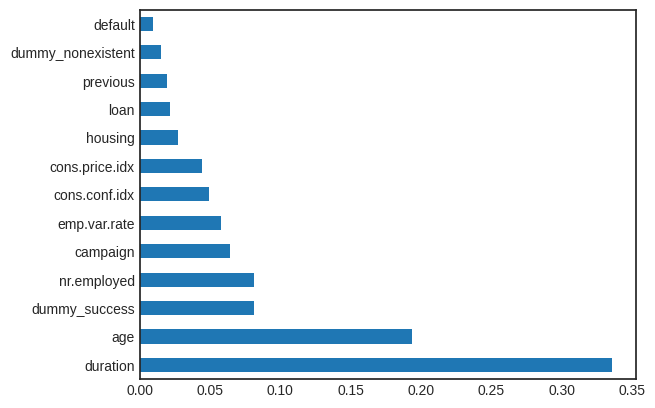

In [149]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

From the bar plot we can see the importances of features based on it's impact towards output. Let's take up the top 15 features

In [151]:
success_rate = scaled_data['y'].mean()
print(f"Overall subscription rate: {success_rate:.2%}")
top_jobs = scaled_data.groupby('job')['y'].mean().sort_values(ascending=False).head()
print("Top jobs by success rate:\n", top_jobs)

Overall subscription rate: 8.09%
Top jobs by success rate:
 job
779     0.293967
1136    0.161972
887     0.128523
9107    0.104645
5888    0.080333
Name: y, dtype: float64


In [153]:
# Save cleaned data
scaled_data.to_csv('cleaned_bank.csv', index=False)
logger.info("EDA complete - cleaned data saved")